In [1]:
# Importing the libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import pandas as pd
%matplotlib inline


In [2]:
# Importing the dataset
dataset = pd.read_csv('Iris.csv')
dataset.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# shape Of the Data Set
print(dataset.shape)


(150, 6)


In [4]:
# Determining Minimum Value of each Column.
dataset.min()

Id                         1
SepalLengthCm            4.3
SepalWidthCm               2
PetalLengthCm              1
PetalWidthCm             0.1
Species          Iris-setosa
dtype: object

In [5]:
# Determining Maximum Value of each Column.
dataset.max()

Id                          150
SepalLengthCm               7.9
SepalWidthCm                4.4
PetalLengthCm               6.9
PetalWidthCm                2.5
Species          Iris-virginica
dtype: object

In [6]:
# Determining Mean Value of each Column.
dataset.mean()

Id               75.500000
SepalLengthCm     5.843333
SepalWidthCm      3.054000
PetalLengthCm     3.758667
PetalWidthCm      1.198667
dtype: float64

In [7]:
# Determining Median Value of each Column.
dataset.median()

Id               75.50
SepalLengthCm     5.80
SepalWidthCm      3.00
PetalLengthCm     4.35
PetalWidthCm      1.30
dtype: float64

In [8]:
# Determining Standard Deviation of each Column.
dataset.std()

Id               43.445368
SepalLengthCm     0.828066
SepalWidthCm      0.433594
PetalLengthCm     1.764420
PetalWidthCm      0.763161
dtype: float64

In [9]:
#drop Id column
dataset = dataset.drop('Id',axis=1)
dataset.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# more info on the data
print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None


In [11]:
# descriptions
print(dataset.describe())


       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [12]:
# class distribution
print(dataset.groupby('Species').size())


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


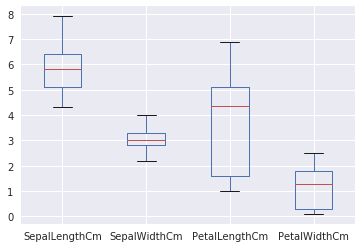

In [13]:
# box and whisker plots
dataset.plot(kind='box', sharex=False, sharey=False)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9bb3bee320>,
      dtype=object)

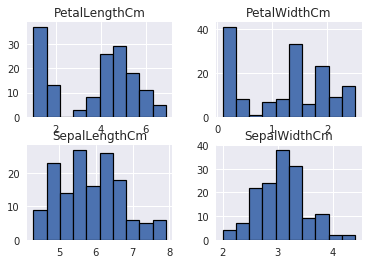

In [14]:
# histograms
dataset.hist(edgecolor='black', linewidth=1.2)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9bb3a94160>,
      dtype=object)

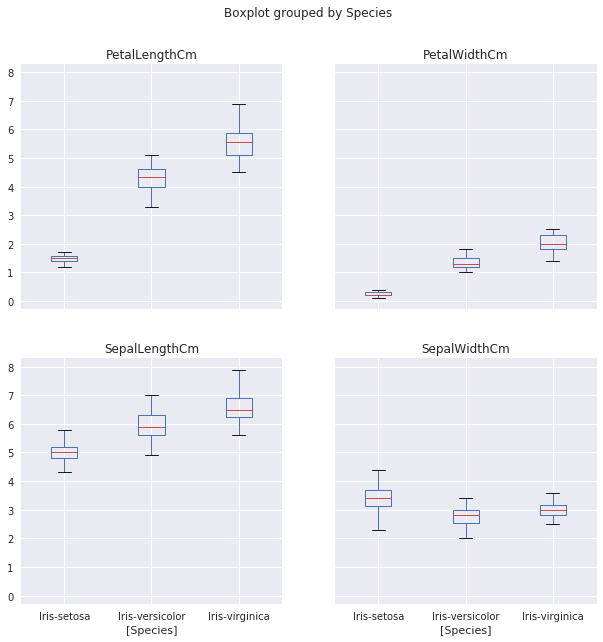

In [15]:
# boxplot on each feature split out by species
dataset.boxplot(by="Species",figsize=(10,10))


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


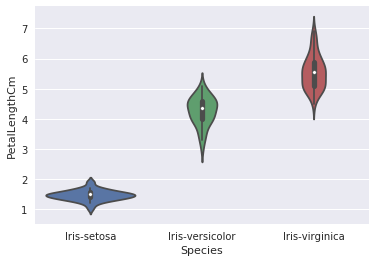

In [16]:
# violinplots on petal-length for each species
sns.violinplot(data=dataset,x="Species", y="PetalLengthCm")


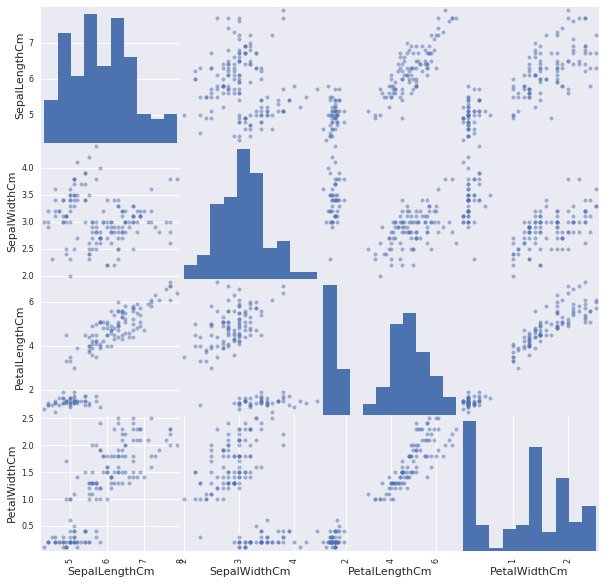

In [17]:
from pandas.tools.plotting import scatter_matrix
# scatter plot matrix
scatter_matrix(dataset,figsize=(10,10))
plt.show()



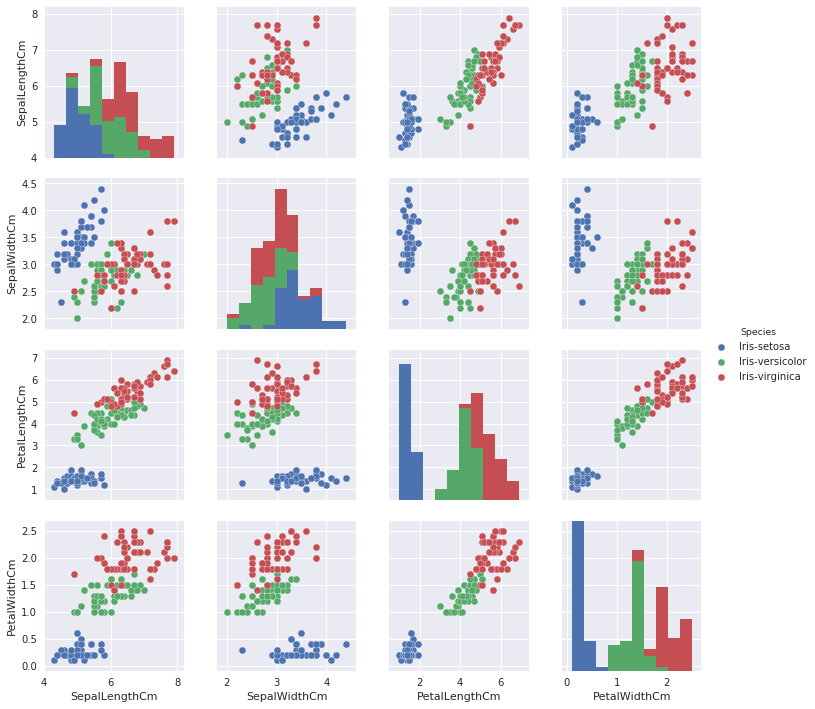

In [18]:
# Using seaborn pairplot to see the bivariate relation between each pair of features
sns.pairplot(dataset, hue="Species")


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


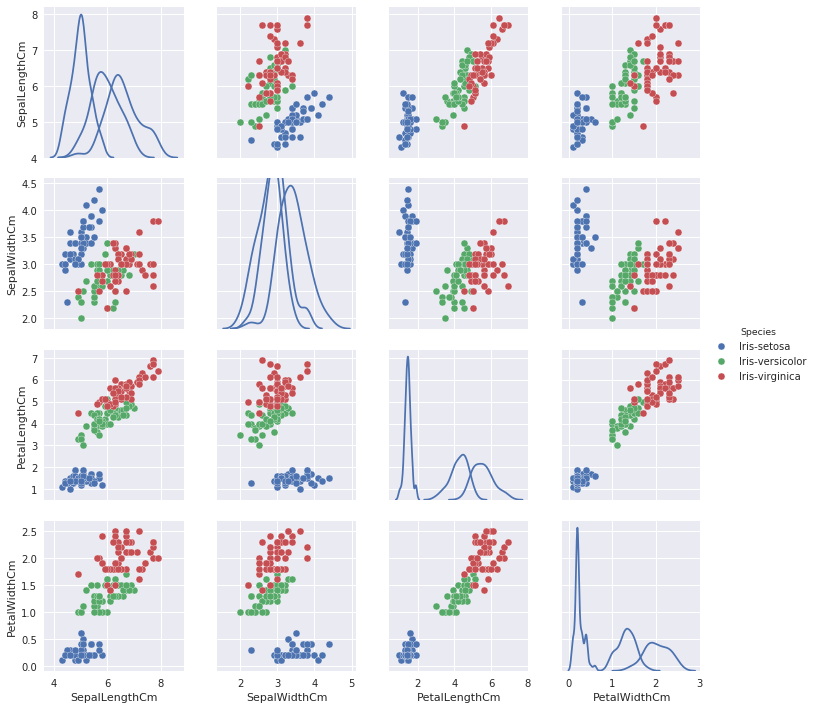

In [19]:
# updating the diagonal elements in a pairplot to show a kde
sns.pairplot(dataset, hue="Species",diag_kind="kde")



In [20]:
# Importing metrics for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [21]:
# Seperating the data into dependent and independent variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [22]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression()
classifier1.fit(X_train, y_train)

y_pred = classifier1.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy percentage on test dataset
from sklearn.metrics import accuracy_score
print('accuracy percentage on test dataset is',round(accuracy_score(y_test,y_pred)*100, 2))

#Accuracy Percentage on training dataset
acc_log1 = round(classifier1.score(X_train, y_train) * 100, 2)
print('accuracy percentage on training dataset is',acc_log1)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

    avg / total       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
accuracy percentage on test dataset is 96.67
accuracy percentage on training dataset is 93.33


In [23]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier2 = GaussianNB()
classifier2.fit(X_train, y_train)

y_pred = classifier2.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy percentage on test dataset
from sklearn.metrics import accuracy_score
print('accuracy percentage on test dataset is',round(accuracy_score(y_test,y_pred)*100, 2))
#Accuracy Percentage on training dataset
acc_log2 = round(classifier2.score(X_train, y_train) * 100, 2)
print('accuracy percentage on training dataset is',acc_log2)


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

    avg / total       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
accuracy percentage on test dataset is 96.67
accuracy percentage on training dataset is 95.0


In [24]:
# Support Vector Machine's 
from sklearn.svm import SVC

classifier3 = SVC()
classifier3.fit(X_train, y_train)

y_pred = classifier3.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy Percentage on test dataset
from sklearn.metrics import accuracy_score
print('accuracy percentage on test dataset is',round(accuracy_score(y_test,y_pred)*100, 2))

#Accuracy Percentage on training dataset
acc_log3 = round(classifier3.score(X_train, y_train) * 100, 2)
print('accuracy percentage on training dataset is',acc_log3)


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

    avg / total       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy percentage on test dataset is 100.0
accuracy percentage on training dataset is 97.5


In [25]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

classifier4 = KNeighborsClassifier(n_neighbors=8)
classifier4.fit(X_train, y_train)

y_pred = classifier4.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy Percentage on test dataset
from sklearn.metrics import accuracy_score
print('accuracy percentage on test dataset is',round(accuracy_score(y_test,y_pred)*100, 2))

#Accuracy Percentage on training dataset
acc_log4 = round(classifier4.score(X_train, y_train) * 100, 2)
print('accuracy percentage on training dataset is',acc_log4)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

    avg / total       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy percentage on test dataset is 100.0
accuracy percentage on training dataset is 96.67


In [26]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

classifier5 = DecisionTreeClassifier()

classifier5.fit(X_train, y_train)

y_pred = classifier5.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy Percentage on test dataset
from sklearn.metrics import accuracy_score
print('accuracy percentage on test dataset is',round(accuracy_score(y_test,y_pred)*100, 2))
#Accuracy Percentage on training dataset
acc_log5 = round(classifier5.score(X_train, y_train) * 100, 2)
print('accuracy percentage on training dataset is',acc_log5)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

    avg / total       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy percentage on test dataset is 100.0
accuracy percentage on training dataset is 100.0


In [27]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'SVC','KNN', 
              'Decision Tree'],
    'Score': [acc_log1, acc_log2, acc_log3, 
              acc_log4, acc_log5]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,100.00
2,SVC,97.50
3,KNN,96.67
1,Naive Bayes,95.00
0,Logistic Regression,93.33
